# Analysis of the population growth over the last 120 years

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read CSV

In [148]:
pop_global_df = pd.read_csv('data/processed/population/population-global.csv', sep=';')
pop_regions_df = pd.read_csv('data/processed/population/population-region.csv', sep=';')
pop_country_df = pd.read_csv('data/processed/population/population-country.csv', sep=';')
dis_all_df = pd.read_csv('data/processed/disaster/disaster-all.csv', sep=',')

In [149]:
un_country_codes = pd.read_csv("data/raw/country-codes/un-country-codes.csv", sep=";")
un_country_codes = un_country_codes[['Region Code', 'Region Name', 'ISO-alpha3 Code']]

In [150]:
#dis_region_with_codes = dis_region_df.merge(un_country_codes, how="left", left_on='country_code', right_on='ISO-alpha3 Code')
#dis_region_with_codes = dis_region_with_codes[['year','Region Code','type','subtype','deaths']]

## Plot world population


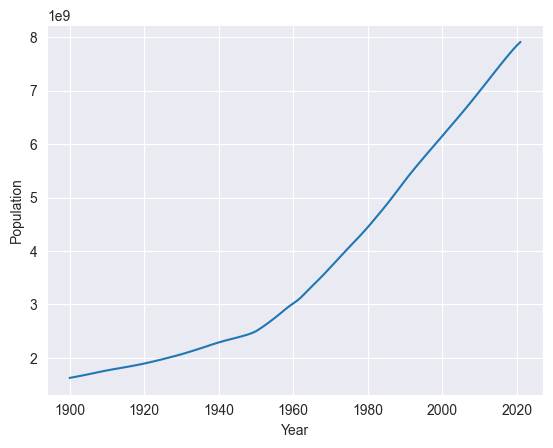

In [151]:
#print(pop_global_df.head(5))
pop_global_df_plot = sns.lineplot(data=pop_global_df, x='year', y='population')
pop_global_df_plot.set_ylabel("Population")
pop_global_df_plot.set_xlabel("Year")
plt.show()

This plot shows the world population from 1900 until 2021. We can observe a significant change in the population growth after WW2 - often referred as the 'boomer generation'. After that, the population growth did not stagnate until now. Let's take a look at the population trend in the specified regions.

# Plot regions population

   region_code region_name  year  population
0          2.0      Africa  1900   138578556
1          2.0      Africa  1901   139018147
2          2.0      Africa  1902   139489077
3          2.0      Africa  1903   139992790
4          2.0      Africa  1904   140510536


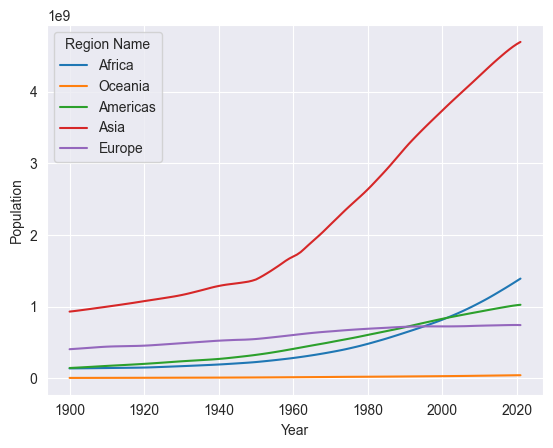

In [152]:
print(pop_regions_df.head(5))
pop_regions_plot = sns.lineplot(data=pop_regions_df, x='year', y='population', estimator=None, hue='region_name')
pop_regions_plot.set_ylabel("Population")
pop_regions_plot.set_xlabel("Year")
pop_regions_plot.get_legend().set_title("Region Name")
plt.show()

The above plot shows the population development of the specified regions. As expected, the population of Asia grew significantly faster, than the population of the other regions. In Europe, the population slightly increased, but with the slowest growing rate. Both America and Africa show an upwards trend since the 1950´s. We will use the population data, to calculate the relative death rate.

# Plot disaster data

In [153]:
dis_all_df['deaths'] = dis_all_df['deaths'].fillna(0)
dis_all_df['deaths'] = dis_all_df['deaths'].astype(int)

#extract rows with recorded deaths
dis_all_with_deaths = dis_all_df[dis_all_df['deaths'] > 0]
print(dis_all_with_deaths['deaths'].describe().astype(int))

count      10459
mean        2184
std        60938
min            1
25%            5
50%           17
75%           54
max      3700000
Name: deaths, dtype: int64


The dataset contains 10459 entries of naturals disaster with at least one recorded death.

# Calculate relative deaths

In [154]:
dis_all_with_rel_deaths = pd.merge(dis_all_with_deaths, pop_country_df, how='left', on=['year', 'country_code', 'country_name'])
dis_all_with_rel_deaths['rel_deaths'] = dis_all_with_rel_deaths['deaths']/dis_all_with_rel_deaths['population']
print(dis_all_with_rel_deaths.head())

   Unnamed: 0  year         dis_no           region continent country_name  \
0           0  1900  1900-9002-CPV   Western Africa    Africa   Cabo Verde   
1           1  1900  1900-9001-IND    Southern Asia      Asia        India   
2           3  1902  1902-0012-GTM  Central America  Americas    Guatemala   
3           4  1902  1902-0003-GTM  Central America  Americas    Guatemala   
4           5  1902  1902-0010-GTM  Central America  Americas    Guatemala   

  country_code                   location               type          subtype  \
0          CPV                Countrywide            Drought          Drought   
1          IND                     Bengal            Drought          Drought   
2          GTM  Quezaltenango, San Marcos         Earthquake  Ground movement   
3          GTM                        NaN  Volcanic activity         Ash fall   
4          GTM                        NaN  Volcanic activity         Ash fall   

    deaths  dis_mag_value dis_mag_scale  sta

# Split dataset into global, regional and country sub-datasets.

In [155]:
#get global dataset
dis_global_df = dis_all_with_rel_deaths.groupby('year').sum('deaths')
dis_global_df.reset_index(inplace=True)
dis_global_df = dis_global_df[['year', 'deaths']]
dis_global_df = dis_global_df.merge(pop_global_df, on='year')
dis_global_df['rel_deaths'] = dis_global_df['deaths'] / dis_global_df['population']
dis_global_df = dis_global_df[['year', 'deaths', 'rel_deaths']]
print(dis_global_df.head())


#get regional dataset
dis_region_df = dis_all_with_rel_deaths.groupby(['year', 'continent']).sum('deaths')
dis_region_df.reset_index(inplace=True)
dis_region_df = dis_region_df[['year', 'continent' ,'deaths']]
dis_region_df = dis_region_df.merge(pop_regions_df, left_on=['year', 'continent'], right_on=['year', 'region_name'])
dis_region_df['rel_deaths'] = dis_region_df['deaths'] / dis_region_df['population']
dis_region_df = dis_region_df[['year', 'region_name', 'region_code', 'deaths', 'rel_deaths']]
dis_region_df.sort_values(['region_name', 'year'], inplace=True)
print(dis_region_df.head())

#get country dataset
dis_country_df = dis_all_with_rel_deaths.groupby(['year', 'country_code', 'country_name']).sum('deaths')
dis_country_df.reset_index(inplace=True)
dis_country_df = dis_country_df[['year', 'country_code', 'country_name', 'deaths', 'rel_deaths']]
print(dis_country_df.head())

   year   deaths    rel_deaths
0  1900  1267470  7.789634e-04
1  1901       18  1.097772e-08
2  1902    48438  2.930489e-05
3  1903     7136  4.281359e-06
4  1904      152  9.043314e-08
    year region_name  region_code  deaths    rel_deaths
0   1900      Africa          2.0   11000  7.937736e-05
7   1903      Africa          2.0      17  1.214348e-07
22  1909      Africa          2.0     100  6.978114e-07
26  1910      Africa          2.0   85012  5.908120e-04
49  1920      Africa          2.0   24000  1.592712e-04
   year country_code country_name   deaths    rel_deaths
0  1900          CPV   Cabo Verde    11000  0.000000e+00
1  1900          IND        India  1250000  4.452928e-03
2  1900          JAM      Jamaica      300  4.122714e-04
3  1900          JPN        Japan       30  6.754246e-07
4  1900          TUR      Türkiye      140  0.000000e+00


In [156]:
def getTwinxBarPlot(data, xcolumn, ycolumn1, ycolumn2, xlabel, title):
    ax = sns.barplot(data=data, x=xcolumn, y=ycolumn1, errorbar=None, color='steelblue', label='Number of deaths')

    width_scale = 0.45
    for bar in ax.containers[0]:
        bar.set_width(bar.get_width() * width_scale)
    ax.grid(False)
    ax.set_ylabel('Number of deaths')
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    ax2 = ax.twinx()
    sns.barplot(data=data, x=xcolumn, y=ycolumn2, ax=ax2, color='orange', label=' Relative number of deaths')
    for bar in ax2.containers[0]:
        x = bar.get_x()
        w = bar.get_width()
        bar.set_x(x + w * (1- width_scale))
        bar.set_width(w * width_scale)
    ax2.grid(False)
    ax2.set_ylabel('Relative number of deaths')

    plt.show()

  region_name    deaths  rel_deaths
0      Africa    934716    0.002612
1    Americas    756637    0.001756
2        Asia  19467075    0.014566
3      Europe   1659022    0.003418
4     Oceania     15434    0.000925


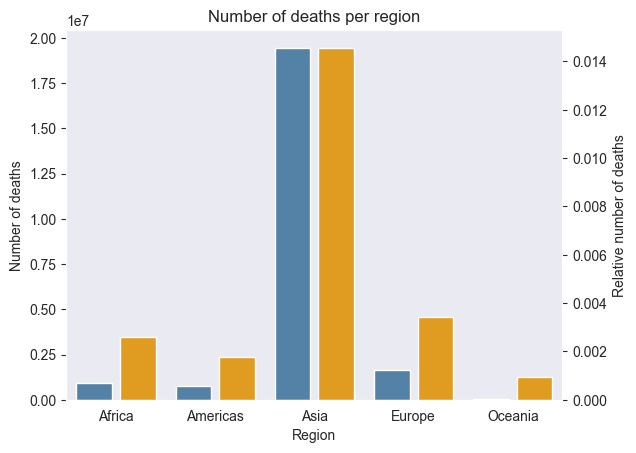

"ax = sns.barplot(data=dis_region_df_sum, x='region_name', y='deaths', errorbar=None, color='steelblue', label='Number of deaths')\n\nwidth_scale = 0.45\nfor bar in ax.containers[0]:\n    bar.set_width(bar.get_width() * width_scale)\nax.grid(False)\nax.set_ylabel('Number of deaths')\nax.set_xlabel('Region')\n\nax2 = ax.twinx()\nsns.barplot(data=dis_region_df_sum, x='region_name', y='rel_deaths', ax=ax2, color='orange', label=' Relative number of deaths')\nfor bar in ax2.containers[0]:\n    x = bar.get_x()\n    w = bar.get_width()\n    bar.set_x(x + w * (1- width_scale))\n    bar.set_width(w * width_scale)\nax2.grid(False)\nax2.set_ylabel('Relative number of deaths')\n\nplt.show()"

In [157]:
from matplotlib.ticker import PercentFormatter

#sum of deaths per region
dis_region_df_sum = dis_region_df.groupby('region_name').sum(numeric_only=True)
dis_region_df_sum.reset_index(inplace=True)
dis_region_df_sum = dis_region_df_sum[['region_name', 'deaths', 'rel_deaths']]
print(dis_region_df_sum.head())

getTwinxBarPlot(dis_region_df_sum, 'region_name', 'deaths', 'rel_deaths', 'Region', 'Number of deaths per region')

This plot shows both, the number of deaths per region (blue) and the relative number of deaths per region (orange). We can see, that Asia has by far the most deaths and relative deaths. Lets take a closer look at natural disasters happened in Asia.

    year region_name  region_code   deaths    rel_deaths
2   1900        Asia        142.0  1250170  1.342545e-03
3   1901        Asia        142.0       18  1.920866e-08
5   1902        Asia        142.0     3225  3.418370e-06
9   1903        Asia        142.0     6630  6.977117e-06
10  1904        Asia        142.0      148  1.546286e-07


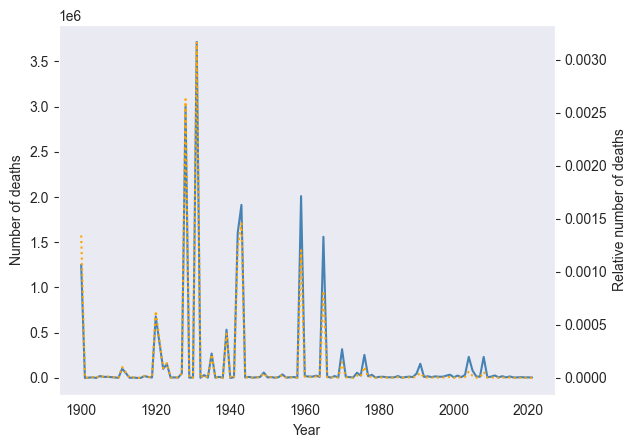

In [158]:
dis_region_asia = dis_region_df[dis_region_df['region_name'] == 'Asia']
print(dis_region_asia.head())

#deaths and relative deaths over time
ax = sns.lineplot(data=dis_region_asia, x='year', y='deaths', color='steelblue')
ax.grid(False)
ax.set_ylabel('Number of deaths')
ax.set_xlabel('Year')

ax2 = ax.twinx()
ax2 = sns.lineplot(data=dis_region_asia, x='year', y='rel_deaths', color='orange', linestyle=':')
ax2.set_ylabel('Relative number of deaths')
ax2.grid(False)
plt.show()

This figure shows the number of deaths and relative number of deaths in Asia. Note that both y-axis are scaled to the max value. The biggest natural disaster happened in 1931. Since then, the number of deaths decreased. Due to the rapid population growth of asia, the relative death rate per disaster decreased even more. After 1965 the deaths of natural disasters sharply decreased.

Generate Plots with absolut and relative deaths for each region

## Europe

    year region_name  region_code   deaths    rel_deaths
6   1902      Europe        150.0     4648  1.124255e-05
11  1904      Europe        150.0        4  9.506891e-09
14  1905      Europe        150.0      677  1.594955e-06
17  1906      Europe        150.0      706  1.648697e-06
21  1908      Europe        150.0    75000  1.720798e-04
25  1909      Europe        150.0       76  1.730648e-07
31  1911      Europe        150.0       90  2.026630e-07
38  1914      Europe        150.0      134  2.990939e-07
41  1915      Europe        150.0    29980  6.675088e-05
52  1920      Europe        150.0     1600  3.508767e-06
53  1921      Europe        150.0  1200000  2.617131e-03
56  1922      Europe        150.0      100  2.166566e-07
59  1923      Europe        150.0       23  4.946035e-08
67  1926      Europe        150.0     1028  2.161271e-06
73  1928      Europe        150.0      298  6.171150e-07
79  1930      Europe        150.0     2234  4.558157e-06
82  1931      Europe        150

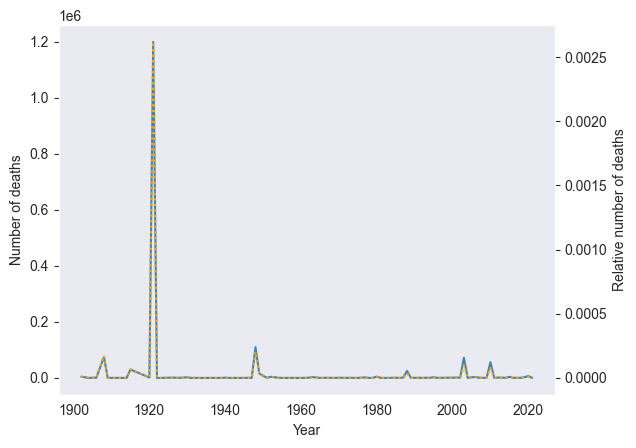

In [159]:
dis_region_europe = dis_region_df[dis_region_df['region_name'] == 'Europe']
print(dis_region_europe.head(20))

#deaths and relative deaths over time
ax = sns.lineplot(data=dis_region_europe, x='year', y='deaths', color='steelblue')
ax.grid(False)
ax.set_ylabel('Number of deaths')
ax.set_xlabel('Year')

ax2 = ax.twinx()
ax2 = sns.lineplot(data=dis_region_europe, x='year', y='rel_deaths', color='orange', linestyle=':')
ax2.set_ylabel('Relative number of deaths')
ax2.grid(False)
plt.show()

## Get deadliest countries

In [160]:
dis_country_sum = dis_country_df.groupby(['country_name', 'country_code']).sum(numeric_only=True)
dis_country_sum.reset_index(inplace=True)
dis_country_sum.sort_values('deaths', inplace=True, ascending=False)
print(dis_country_sum.head(15))

dis_country_sum.sort_values('rel_deaths', inplace=True, ascending=False)
print(dis_country_sum.head(15))

                   country_name country_code    year    deaths  rel_deaths
38                        China          CHN  175203  10960627    0.021165
86                        India          IND  170049   4591741    0.012099
14                   Bangladesh          BGD  135028   2590902    0.061324
173                Soviet Union          SUN   37231   1357423    0.000000
64                     Ethiopia          ETH   63835    404750    0.011228
82                        Haiti          HTI   87604    245431    0.027285
94                        Japan          JPN  195008    239400    0.003551
87                    Indonesia          IDN  150430    239103    0.001560
139                    Pakistan          PAK  125229    180452    0.003180
88   Iran (Islamic Republic of)          IRN  148272    163087    0.000000
177                       Sudan          SDN   58167    151683    0.008057
124                     Myanmar          MMR   75504    146820    0.003333
92                       

# Countries

In [161]:
def getTwinxBarPlot(data, xcolumn, ycolumn1, ycolumn2, xlabel, title):
    ax = sns.barplot(data=data, x=xcolumn, y=ycolumn1, errorbar=None, color='steelblue', label='Number of deaths')

    width_scale = 0.45
    for bar in ax.containers[0]:
        bar.set_width(bar.get_width() * width_scale)
    ax.grid(False)
    ax.set_ylabel('Number of deaths')
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    ax2 = ax.twinx()
    sns.barplot(data=data, x=xcolumn, y=ycolumn2, ax=ax2, color='orange', label=' Relative number of deaths')
    for bar in ax2.containers[0]:
        x = bar.get_x()
        w = bar.get_width()
        bar.set_x(x + w * (1- width_scale))
        bar.set_width(w * width_scale)
    ax2.grid(False)
    ax2.set_ylabel('Relative number of deaths')

    plt.show()

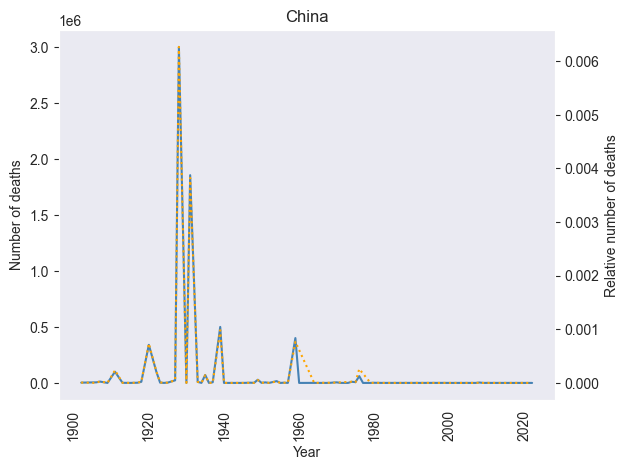

Flood


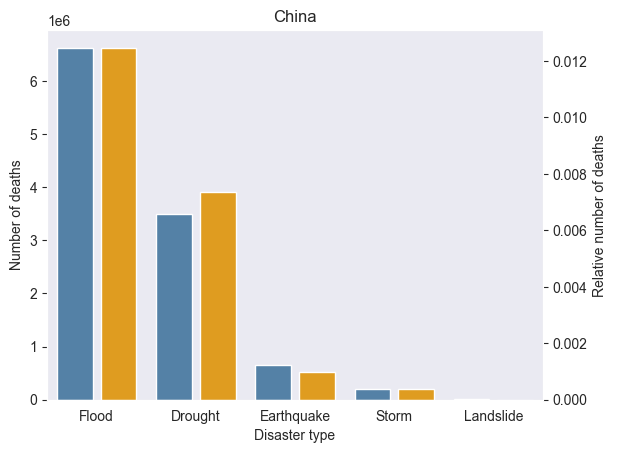

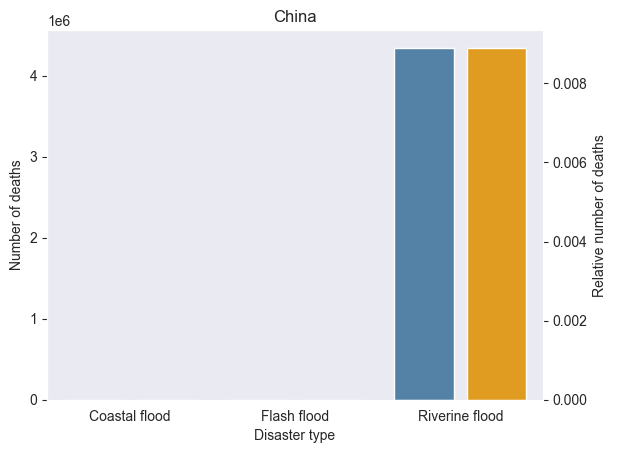

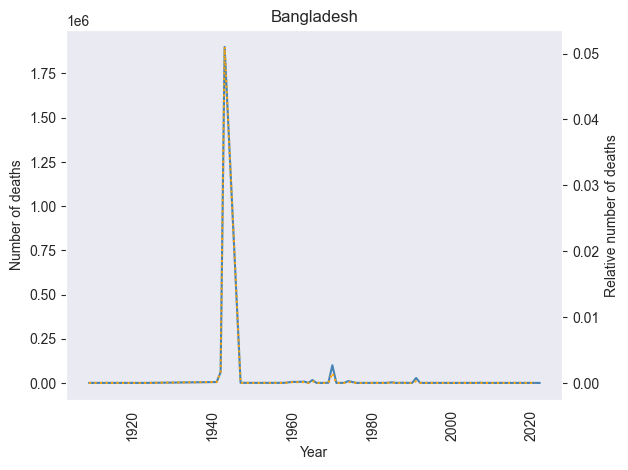

Drought


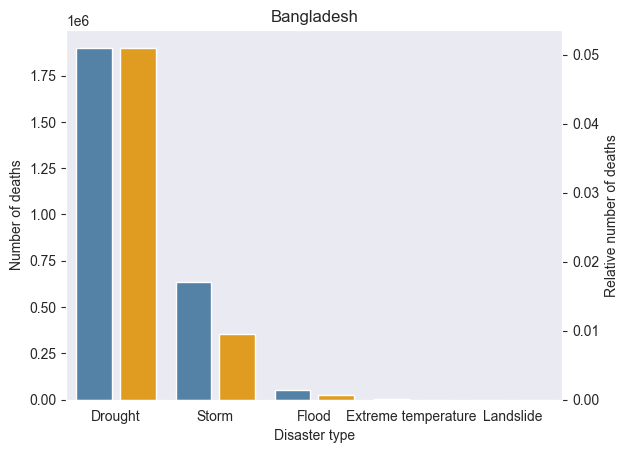

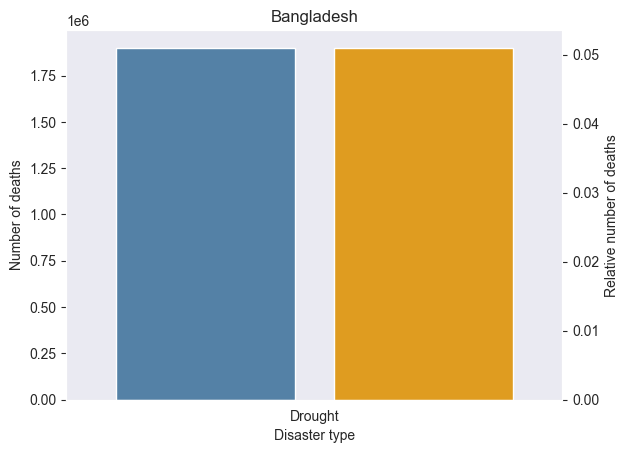

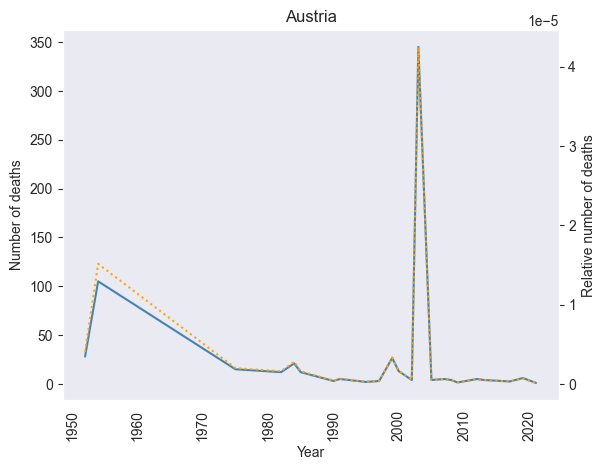

Landslide


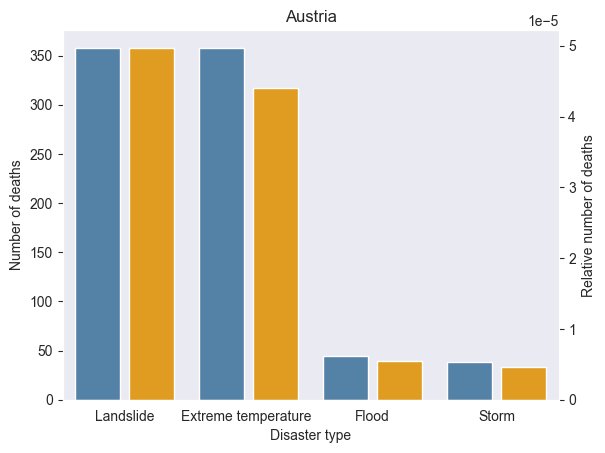

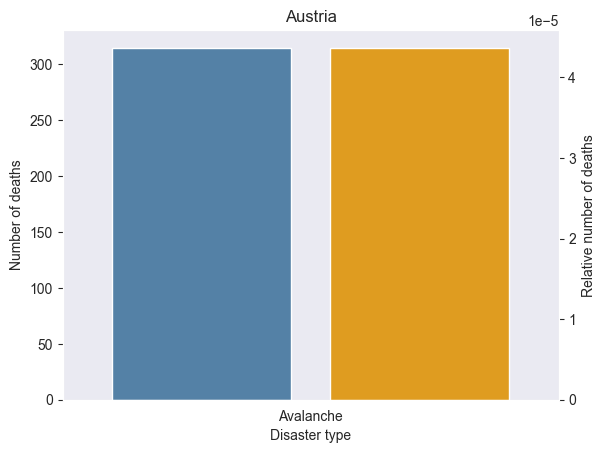

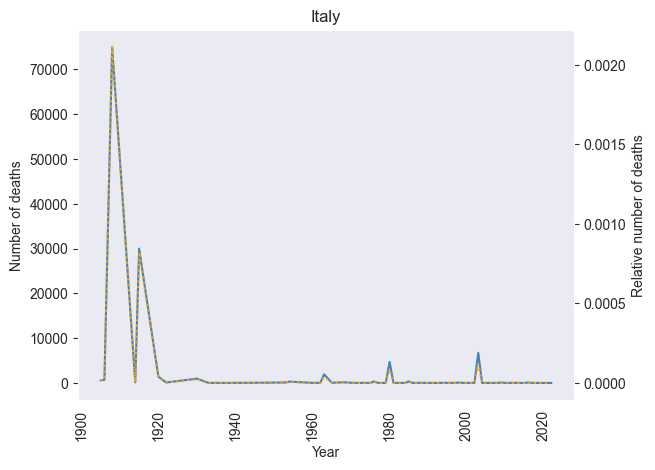

Earthquake


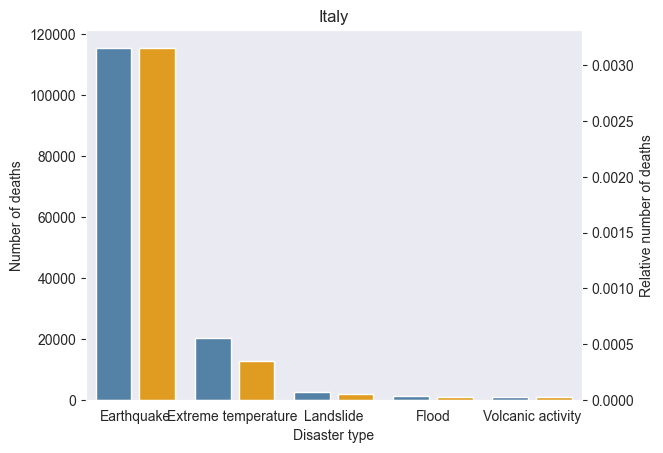

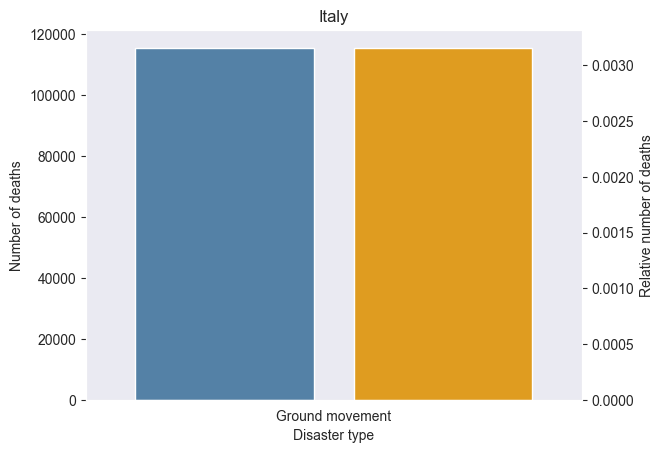

In [164]:
countries = ['China', 'Bangladesh', 'Austria', 'Italy']

for country_name in countries:
    dis_country_with_type = dis_all_with_rel_deaths.loc[dis_all_with_rel_deaths['country_name'] == country_name, ['year', 'country_name', 'deaths', 'rel_deaths', 'type', 'subtype']]

    #deaths and relative deaths over time
    ax = sns.lineplot(data=dis_country_with_type, x='year', y='deaths', color='steelblue', errorbar=None)
    ax.grid(False)
    ax.set_ylabel('Number of deaths')
    ax.set_xlabel('Year')
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(country_name)

    ax2 = ax.twinx()
    ax2 = sns.lineplot(data=dis_country_with_type, x='year', y='rel_deaths', color='orange', linestyle=':', errorbar=None)
    ax2.set_ylabel('Relative number of deaths')
    ax2.grid(False)
    plt.show()

    #get deadliest disaster type
    dis_country_with_type_sum = dis_country_with_type.groupby('type').sum(numeric_only=True)
    dis_country_with_type_sum.reset_index(inplace=True)
    dis_country_with_type_sum.sort_values('rel_deaths', inplace=True, ascending=False)
    dis_country_with_type_sum = dis_country_with_type_sum.head(5)
    dis_typ = dis_country_with_type_sum.iloc[0, 0]
    print(dis_typ)

    getTwinxBarPlot(dis_country_with_type_sum, 'type', 'deaths', 'rel_deaths', 'Disaster type', country_name)

    #with subtypes
    dis_country_with_type_and_subtype_sum = dis_country_with_type.groupby(['type', 'subtype']).sum(numeric_only=True)
    dis_country_with_type_and_subtype_sum.reset_index(inplace=True)
    dis_country_with_type_and_subtype_sum = dis_country_with_type_and_subtype_sum.loc[dis_country_with_type_and_subtype_sum['type'] == dis_typ, :]

    getTwinxBarPlot(dis_country_with_type_and_subtype_sum, 'subtype', 'deaths', 'rel_deaths', 'Disaster type', country_name)

In [163]:
dis_country_sum_deaths = dis_country_df.groupby('country_name').sum('deaths')
dis_country_sum_deaths.reset_index(inplace=True)
dis_country_sum_deaths.drop(['Unnamed: 0', 'year'], axis=1, inplace=True)
dis_country_sum_deaths.sort_values('deaths', inplace=True, ascending=False)
print(dis_country_sum_deaths.head(20))
dis_country_sum_deaths = dis_country_sum_deaths.iloc[0:20, :]
dis_country_sum_deaths_plot = sns.barplot(data=dis_country_sum_deaths, x=dis_country_sum_deaths['country_name'], y=dis_country_sum_deaths['deaths'])
dis_country_sum_deaths_plot.tick_params(axis='x', rotation=90)

plt.show()

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
dis_country_china = dis_country_df[dis_country_df['country_name'] == 'China']

#pre processing
dis_country_china_by_type = dis_country_china.groupby('type').count()
dis_country_china_by_type.reset_index(inplace=True)
dis_country_china_by_type = dis_country_china_by_type.loc[:, ['type', 'year']]
dis_country_china_by_type.rename(columns={'year': 'occurrences', 'type': 'disaster type'}, inplace=True)
print(dis_country_china_by_type.head())

#plot
dis_country_china_by_type_plot = sns.barplot(data=dis_country_china_by_type, x=dis_country_china_by_type['disaster type'], y='occurrences')
dis_country_china_by_type_plot.tick_params(axis='x', rotation=90)
plt.show()

In [ ]:
dis_country_china_storm = dis_country_china.loc[dis_country_china['type'] == 'Storm', :]
dis_country_china_storm = dis_country_china_storm.groupby('subtype').count()
print(dis_country_china_storm.head())